In [ ]:
from google.colab import drive
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import os
import warnings
import pandas as pd
import datetime as dt
import math
import pmdarima as pm
from pandas.plotting import autocorrelation_plot
\
from sklearn.preprocessing import MinMaxScaler

from IPython.display import Image
 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.stattools import adfuller  
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.regression.linear_model import OLS



drive.mount('/content/drive')
working_dir = "/content/drive"
IPA = os.path.join(working_dir) 

Mounted at /content/drive


In [ ]:
Df=pd.read_csv('/content/drive/MyDrive/CPU_DATA.csv')
Df.head(10)

,Time,BusyUser
0,27/06/2022 13:13,28.9
1,27/06/2022 13:13,38.1
2,27/06/2022 13:13,44.4
3,27/06/2022 13:13,45.0
4,27/06/2022 13:14,43.6
5,27/06/2022 13:14,44.0
6,27/06/2022 13:14,45.0
7,27/06/2022 13:14,45.6
8,27/06/2022 13:15,44.2
9,27/06/2022 13:15,44.1


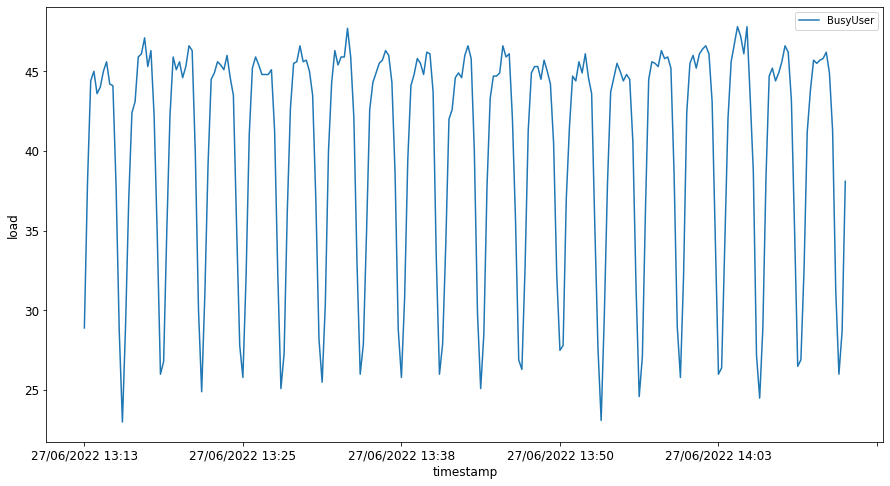

In [ ]:
df = pd.DataFrame(Df)
df =df.set_index('Time')
data_time_index=df

data_time_index.plot(y='BusyUser', subplots=True, 
            figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

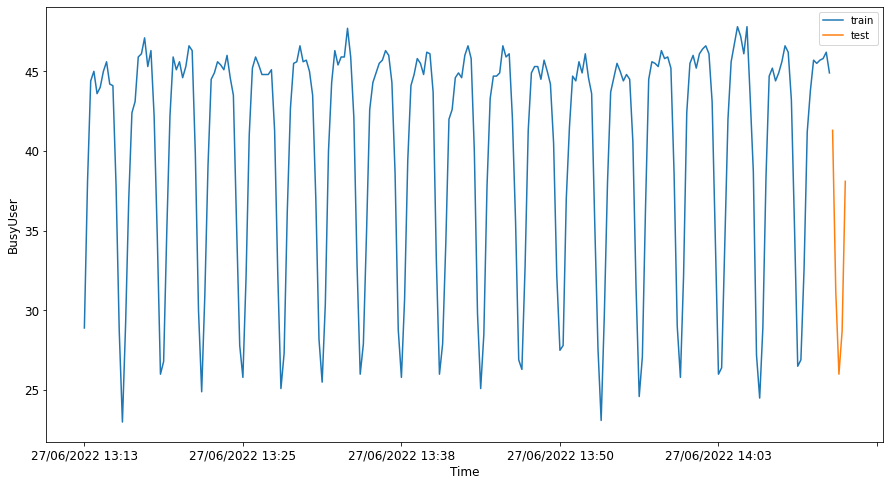

In [ ]:
train_start_dt = '27/06/2022 13:13'
test_start_dt = '27/06/2022 14:12'

data_time_index[(data_time_index.index < test_start_dt) & (data_time_index.index >= train_start_dt)][['BusyUser']].rename(columns={'BusyUser':'train'}) \
    .join(data_time_index[test_start_dt:][['BusyUser']].rename(columns={'BusyUser':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)

plt.xlabel('Time', fontsize=12)
plt.ylabel('BusyUser', fontsize=12)
plt.show()

In [ ]:
train = data_time_index.copy()[(data_time_index.index >= train_start_dt) & (data_time_index.index < test_start_dt)][['BusyUser']]
test = data_time_index.copy()[data_time_index.index >= test_start_dt][['BusyUser']]
 
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (236, 1)
Test data shape:  (5, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


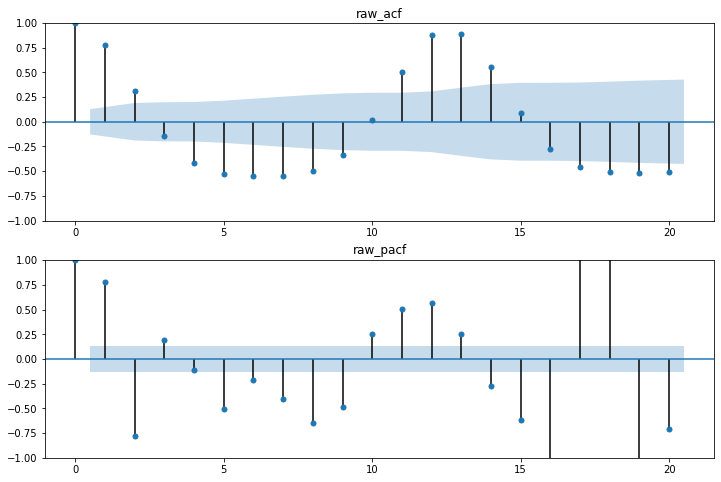

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(12, 4*2))
#acf
plot_acf(train,lags=20,title='raw_acf', ax=axes[0])  
#pacf
plot_pacf(train,lags=20,title='raw_pacf', ax=axes[1])
plt.show()


In [ ]:
arima_model = pm.auto_arima(train, d=1, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1400.220, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1292.385, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1271.822, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1398.269, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1241.048, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1178.375, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1177.874, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1177.585, Time=0.45 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1169.856, Time=0.59 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1134.707, Time=0.22 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=1134.279, Time=0.25 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=1134.359, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1052.148, Time=0.98 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : 

In [ ]:
forecasts = []
forecasts = arima_model.predict(n_periods=5)


print(f"RMSE: {mean_squared_error(test, forecasts,squared = False)}")
print(f"Mean absolute error: {mean_absolute_error(test, forecasts)}")
print(f"mean_absolute_percentage_error: {mean_absolute_percentage_error(test, forecasts)}")


RMSE: 4.913697638247324
Mean absolute error: 4.131981520361981
mean_absolute_percentage_error: 0.14226403524830955


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
